In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

In [16]:
data=pd.read_csv('delivery_time.csv')


In [17]:
data.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [18]:
data1=data.rename(columns={"Delivery Time": "dt","Sorting Time":"st"})

In [19]:
data1.head()

,dt,st
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [20]:
data.corr()

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


Text(0, 0.5, 'Delivery time')

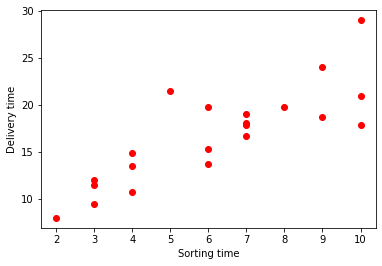

In [21]:
plt.scatter(x=data1.st, y=data1.dt, color='RED')
plt.xlabel("Sorting time")
plt.ylabel("Delivery time")


C:\Users\Vicky\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='dt', ylabel='Density'>

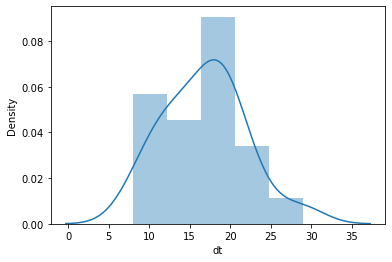

In [22]:
import seaborn as sns
sns.distplot(data1['dt'])

C:\Users\Vicky\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='st', ylabel='Density'>

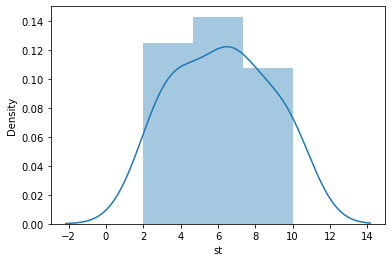

In [23]:
sns.distplot(data1['st'])

{'whiskers': [<matplotlib.lines.Line2D at 0x2746d30e8b0>,
 'caps': [<matplotlib.lines.Line2D at 0x2746d30ee50>,
 'boxes': [<matplotlib.lines.Line2D at 0x2746d30e700>],
 'medians': [<matplotlib.lines.Line2D at 0x2746d31b430>],
 'fliers': [<matplotlib.lines.Line2D at 0x2746d31b700>],
 'means': []}

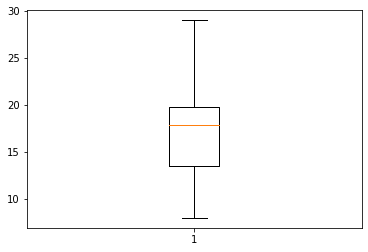

In [24]:
plt.boxplot(data1['dt'])

# MODEL BUILDING

In [25]:
import statsmodels.formula.api as smf

In [26]:
model=smf.ols('dt~st',data=data1).fit()

In [27]:
model.params

Intercept    6.582734
st           1.649020
dtype: float64

In [28]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     dt   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Tue, 16 Aug 2022   Prob (F-statistic):           3.98e-06
Time:                        10:12:11   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.5827      1.722      3.823      0.001       2.979      10.186
st             1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [29]:
#t and p-Values
print(model.tvalues, '\n', model.pvalues)    

Intercept    3.823349
st           6.387447
dtype: float64 
 Intercept    0.001147
st           0.000004
dtype: float64


In [44]:
#Predict for new data points


In [32]:
newdata=pd.Series([5,8])

In [33]:
data_pred=pd.DataFrame(newdata,columns=['st'])

In [34]:
model.predict(data_pred)

0    14.827833
1    19.774893
dtype: float64

In [36]:
model.resid

0    -2.072933
1     0.321186
2     3.273147
3     2.576087
4     5.927067
5    -1.126853
6     0.874127
7    -2.029794
8    -5.172933
9    -2.673913
10    0.055107
11   -2.428814
12   -1.445873
13   -0.029794
14    0.500206
15    1.701186
16   -2.726853
17   -0.015873
18   -1.880774
19   -0.295873
20    6.672167
dtype: float64

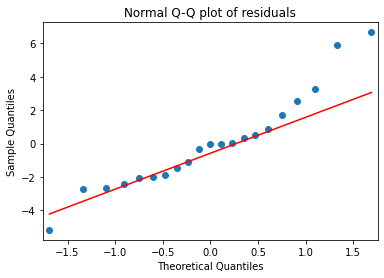

In [37]:
import statsmodels.api as sm
qqplot=sm.qqplot(model.resid,line='q') # line = 45 to draw the diagnoal line
plt.title("Normal Q-Q plot of residuals")
plt.show()

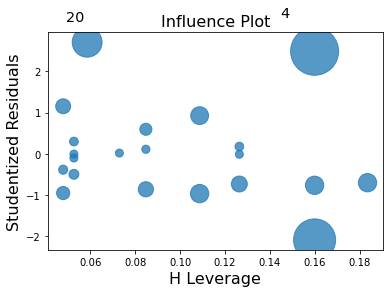

In [38]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)
plt.show()

In [39]:
model_influence = model.get_influence() #to get influence point 
(c, _) = model_influence.cooks_distance #to get greater influnce value

<StemContainer object of 3 artists>

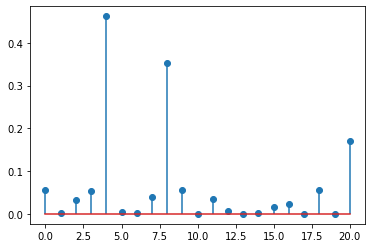

In [42]:
plt.stem(np.arange(len(data1)), np.round(c, 3))

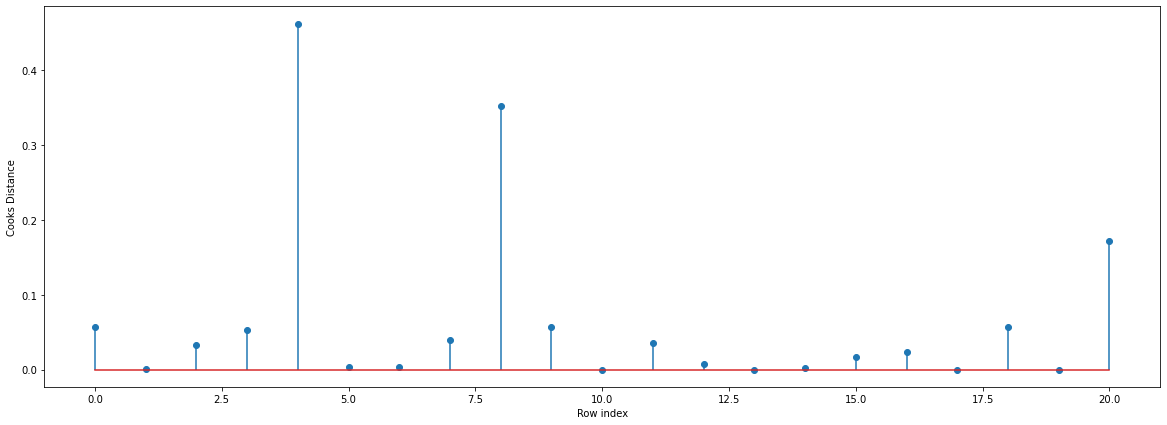

In [43]:
#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(data1)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()